# Data Preprocessing

In [1]:
import matplotlib.pylab as pl
import shap
import xgboost
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from functools import reduce
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# print the JS visualization code to the notebook
shap.initjs()

In [2]:
df = pd.read_csv('/Users/jemma/Desktop/LifeBook/table_diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4541 entries, 0 to 4540
Data columns (total 17 columns):
Unnamed: 0                             4541 non-null int64
SEQN                                   4541 non-null int64
Diabetes                               4541 non-null int64
Family History                         4541 non-null int64
Lack of Physical Activity              4541 non-null int64
Age                                    4541 non-null int64
Race_Non-Hispanic White                4541 non-null int64
Race_Non-Hispanic Black                4541 non-null int64
Race_Mexican American                  4541 non-null int64
Other Hispanic                         4541 non-null int64
Non-Hispanic Asian                     4541 non-null int64
Other Race - Including Multi-Racial    4541 non-null int64
Avg Systolic Blood Pres (3 times)      4541 non-null float64
Avg Diastolic Blood Pre (3 times)      4541 non-null float64
Cholesterol                            4541 non-null int64
Visi

In [4]:
df = df[df.columns[1:].to_list()]
df = df.drop(['Other Race - Including Multi-Racial'], axis=1)

In [5]:
df[df['Diabetes']== 1]

,SEQN,Diabetes,Family History,Lack of Physical Activity,Age,Race_Non-Hispanic White,Race_Non-Hispanic Black,Race_Mexican American,Other Hispanic,Non-Hispanic Asian,Avg Systolic Blood Pres (3 times),Avg Diastolic Blood Pre (3 times),Cholesterol,Vision,BMI
0,83732,1,1,1,62,1,0,0,0,0,122.67,65.33,173,2,27.8
2,83734,1,2,1,78,1,0,0,0,0,135.33,45.33,229,2,28.8
6,83744,1,1,1,56,0,1,0,0,0,179.33,111.33,145,1,33.6
10,83755,1,1,1,67,0,1,0,0,0,133.33,81.33,189,2,28.8
11,83757,1,1,1,57,0,0,0,1,0,142.67,62.67,227,1,35.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,93626,1,1,2,71,1,0,0,0,0,114.67,60.67,128,2,23.1
4511,93631,1,1,2,68,1,0,0,0,0,144.00,57.33,151,2,34.6
4518,93652,1,1,1,72,0,0,0,1,0,128.67,34.67,164,2,32.3
4533,93685,1,1,1,53,0,0,1,0,0,127.33,55.33,157,2,32.0


In [6]:
df[df['Diabetes']== 0]

,SEQN,Diabetes,Family History,Lack of Physical Activity,Age,Race_Non-Hispanic White,Race_Non-Hispanic Black,Race_Mexican American,Other Hispanic,Non-Hispanic Asian,Avg Systolic Blood Pres (3 times),Avg Diastolic Blood Pre (3 times),Cholesterol,Vision,BMI
1,83733,0,1,2,53,1,0,0,0,0,140.00,86.00,265,2,30.8
3,83737,0,1,2,72,0,0,1,0,0,119.33,58.67,190,2,28.6
4,83741,0,1,2,22,0,1,0,0,0,111.33,72.67,164,2,28.0
5,83742,0,1,2,32,0,0,1,0,0,118.00,70.67,190,2,28.2
7,83750,0,2,2,45,0,0,0,0,0,110.67,72.00,181,2,24.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,93691,0,1,2,25,0,0,0,0,1,112.00,76.00,160,2,21.0
4537,93695,0,2,1,76,1,0,0,0,0,111.33,47.33,140,2,21.5
4538,93697,0,2,1,80,1,0,0,0,0,148.00,55.33,256,1,31.0
4539,93700,0,2,2,35,1,0,0,0,0,104.67,65.33,144,2,26.0


We can see that the dataset is seriously imbalanced.

### Data Split Method 1: train_test_split

In [7]:
y = df['Diabetes'].values
x_columns = set(df.columns)
x_columns.remove('Diabetes')
x_columns.remove('SEQN')
X=df[x_columns].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
print(X.shape)
print(y.shape)

(4541, 13)
(4541,)


# Modeling Process

## Model 1: Logistic Regression Classifier Model

In [9]:
class LogisticRegressionClassifier:

    def __init__(self, n=100):
        self.n = n

    def fit(self, X, y, random_state=42, criterion='entropy'):
        X_train_p = X[y==1]
        X_train_n = X[y==0]
        y_train_p = y[y==1]
        y_train_n = y[y==0]
        l = sum(y_train_p)
        clf_list = []
        np.random.seed(seed=random_state)
        for i in range(self.n):
            idx_n = np.random.choice(range(X_train_n.shape[0]), l)
            idx_p = np.random.choice(range(X_train_p.shape[0]), l)
            X_train_f = np.concatenate([X_train_n[idx_n, :], X_train_p[idx_p]])
            y_train_f = np.concatenate([y_train_n[idx_n], y_train_p[idx_p]])
            clf = LogisticRegression()
            clf.fit(X_train_f, y_train_f)
            clf_list.append(clf)
            print(f'\rClassifier {i+1} completed.', end='')
        self.clfs = clf_list        
    
    def coefficients(self):
        feature_importance = abs(self.clfs[0].coef_)
        for tree in self.clfs[1:]:
            feature_importance += tree.coef_
        return feature_importance/ self.n
    
    def predict(self, X):
        result_list = list(map(lambda clf: clf.predict_proba(X)[:,1], self.clfs)) # proba of label: y==1
        score = reduce(lambda a, b: a+b, result_list) / len(self.clfs)
        return score
        
    def report(self, X, y):
        y_hat = self.predict(X)
        print(classification_report(y_test, 1.*(y_hat>0.5)))
    
    def predict_proba(self,X):
        result_list = list(map(lambda clf: 100*clf.predict_proba(X)[:,1], self.clfs))
        proba = reduce(lambda a, b: a+b, result_list) / len(self.clfs)
        return proba

### Model Training

In [10]:
btc = LogisticRegressionClassifier(500)
btc.fit(X_train, y_train)
y_hat = 1.0 * (btc.predict(X_test)>0.5)

Classifier 500 completed.

In [11]:
btc.coefficients() # avg coefficients of n classifiers 

array([[-0.00639303,  0.05856437, -0.95631222, -1.38850453,  0.00894416,
        -0.00707856, -0.66016977,  0.14799488, -0.34573019,  0.28995134,
         0.32185448,  0.40907472,  0.05847099]])

### Risk Score of test data

In [12]:
reshaped_X_test = pd.DataFrame(X_test)
reshaped_X_test.index = np.arange(1,len(reshaped_X_test)+1)

In [13]:
predictors_name = pd.DataFrame(df[df.columns[2:]].columns)
predictors_name.loc[predictors_name.index.max() + 1] = "Risk Score"
predictors_name_transpose = predictors_name.transpose()

In [14]:
reshaped_risk_score = pd.DataFrame(btc.predict_proba(X_test).reshape(-1,1))
reshaped_risk_score.index = np.arange(1,len(reshaped_risk_score)+1)
risk_score_tb = pd.concat([reshaped_X_test,reshaped_risk_score], axis=1, ignore_index=True)
risk_score_tb_final = risk_score_tb.rename(columns= predictors_name_transpose.loc[0])
#risk_score_tb_final.to_excel('risk_score_tb_final.xls')

In [15]:
risk_score_tb_final.head()

,Family History,Lack of Physical Activity,Age,Race_Non-Hispanic White,Race_Non-Hispanic Black,Race_Mexican American,Other Hispanic,Non-Hispanic Asian,Avg Systolic Blood Pres (3 times),Avg Diastolic Blood Pre (3 times),Cholesterol,Vision,BMI,Risk Score
1,76.67,29.8,1.0,1.0,118.67,205.0,2.0,0.0,1.0,0.0,0.0,0.0,51.0,49.361828
2,64.00,32.1,2.0,2.0,126.00,174.0,2.0,0.0,1.0,0.0,0.0,0.0,37.0,6.465584
3,46.67,28.1,1.0,1.0,145.33,196.0,1.0,1.0,0.0,0.0,0.0,0.0,80.0,95.983067
4,64.67,39.7,1.0,1.0,138.67,118.0,2.0,0.0,0.0,0.0,0.0,1.0,22.0,61.692952
5,70.00,21.6,2.0,2.0,113.33,145.0,2.0,0.0,0.0,0.0,0.0,1.0,25.0,4.066030


In [16]:
reshaped_cof = pd.DataFrame(btc.coefficients().reshape(-1,1))
predictors_final = pd.DataFrame(df[df.columns[2:]].columns)
predictors_final.index = np.arange(1,len(predictors_final)+1)
reshaped_cof.index =  np.arange(1,len(reshaped_cof)+1)

In [17]:
coefficient_tb1= pd.concat([predictors_final,reshaped_cof], axis=1, ignore_index=True)
coefficient_tb2 = coefficient_tb1.rename(columns={0: "Predictor", 1: "Coefficient"})
coefficient_tb_final = coefficient_tb2.sort_values(by=["Coefficient"],ascending=False)
coefficient_tb_final.head(10)
#coefficient_tb_final.to_csv('coefficient_tb_final.csv')

,Predictor,Coefficient
12,Vision,0.409075
11,Cholesterol,0.321854
10,Avg Diastolic Blood Pre (3 times),0.289951
8,Non-Hispanic Asian,0.147995
2,Lack of Physical Activity,0.058564
13,BMI,0.058471
5,Race_Non-Hispanic Black,0.008944
1,Family History,-0.006393
6,Race_Mexican American,-0.007079
9,Avg Systolic Blood Pres (3 times),-0.345730


### Model Prediction Accuracy

In [18]:
print(classification_report(y_true=y_test, y_pred=y_hat))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       983
           1       0.32      0.75      0.45       153

    accuracy                           0.75      1136
   macro avg       0.63      0.75      0.64      1136
weighted avg       0.87      0.75      0.78      1136



In [19]:
btc = LogisticRegressionClassifier(500)
btc.fit(X_train, y_train)
y_hat_train = 1.0 * (btc.predict(X_train)>0.5)

Classifier 500 completed.

In [20]:
print(classification_report(y_true=y_train, y_pred=y_hat_train))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2878
           1       0.37      0.79      0.50       527

    accuracy                           0.76      3405
   macro avg       0.66      0.77      0.67      3405
weighted avg       0.86      0.76      0.79      3405



In [21]:
confusion_matrix(y_true=y_test, y_pred=y_hat)

array([[735, 248],
       [ 38, 115]])

### Feature Importance

In [22]:
feature_importance = abs(coefficient_tb_final[coefficient_tb_final.columns[1]])
feature_importance = 100.0 * (feature_importance / feature_importance.max())

In [23]:
score = feature_importance.head(10)
predictors_10 = coefficient_tb_final[coefficient_tb_final.columns[0]].head(10)
feature_importance_table = pd.concat([predictors_10,score], axis=1)
feature_importance_table
feature_importance_table_desc = feature_importance_table.sort_values(by=["Coefficient"],ascending=True)
feature_importance_table_desc

,Predictor,Coefficient
1,Family History,0.460425
6,Race_Mexican American,0.509798
5,Race_Non-Hispanic Black,0.644158
13,BMI,4.211076
2,Lack of Physical Activity,4.217802
8,Non-Hispanic Asian,10.658581
10,Avg Diastolic Blood Pre (3 times),20.882276
11,Cholesterol,23.179937
9,Avg Systolic Blood Pres (3 times),24.899465
12,Vision,29.461533


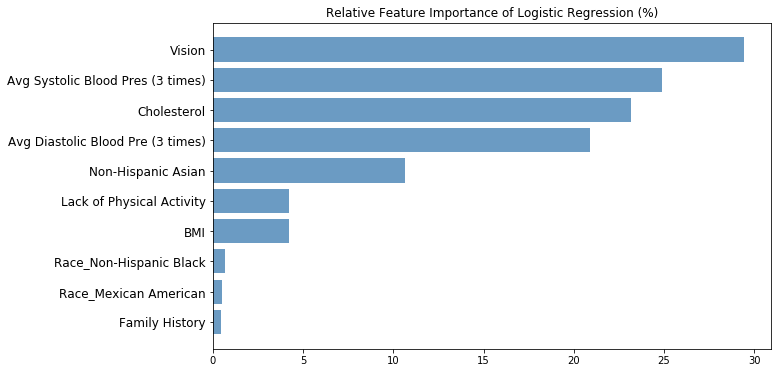

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,6))

share = feature_importance_table_desc[feature_importance_table_desc.columns[1]]
plt.barh(range(10), share, align = 'center',color='steelblue', alpha = 0.8)

plt.yticks(range(10),feature_importance_table_desc[feature_importance_table_desc.columns[0]], fontsize=12)
#ax.set_xlabels('Relative Feature Importance (%)')
#xticks(np.arange(10), ['Tom', 'Dick', 'Sue',]) 
#plt.tight_layout()   
plt.title('Relative Feature Importance of Logistic Regression (%)')
plt.show()

## Model 2: XGBoost

### Model Training

import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
#### find the best parameter

nmc = 100 

#### set up dictionary for grid search
####  dictionary name must now include pipeline function name then __

n_estimators = 100
max_depth = range(3,10,2)
gamma = [i/10.0 for i in range(0,5)]
min_child_weight = range(1,6,2)

param_grid={'gamma': gamma,'max_depth': max_depth,'min_child_weight': min_child_weight}
#### set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.2,n_splits=nmc,random_state=25)
#### set up search
grid_search=GridSearchCV(XGBClassifier(),param_grid,cv=cvf,return_train_score=True)
#### implement search
grid_search.fit(X,y)
#### move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_depth','param_min_child_weight','param_gamma']])

In [25]:
# use best parameters: max_depth= 3, min_child_weight=  3, gamma=0
from xgboost import XGBClassifier
xgb = XGBClassifier(
 max_depth= 3, 
 min_child_weight= 5,
 gamma=0.4,
 learning_rate =0.1,
 n_estimators=1000,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1)


xgb.fit(X_train,y_train)
print('Training score:', xgb.score(X_train,y_train))
print('Testing score:',xgb.score(X_test,y_test))

Training score: 0.9533039647577093
Testing score: 0.8556338028169014


In [26]:
# confusion matrix        
pred = xgb.predict(X_test)
confusion_matrix(y_true=y_test, y_pred=pred)

array([[924,  59],
       [105,  48]])

In [27]:
print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       983
           1       0.45      0.31      0.37       153

    accuracy                           0.86      1136
   macro avg       0.67      0.63      0.64      1136
weighted avg       0.84      0.86      0.84      1136



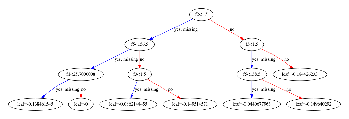

In [28]:
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 40, 50
tree_num = 0
xgboost.plot_tree(xgb, num_trees=tree_num)

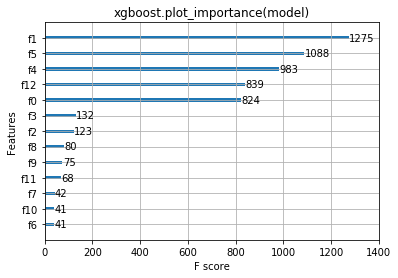

In [29]:
xgboost.plot_importance(xgb)
pl.title("xgboost.plot_importance(model)")
pl.show()

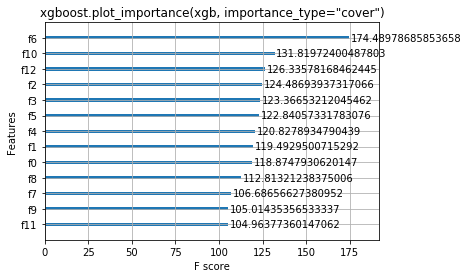

In [30]:
xgboost.plot_importance(xgb, importance_type="cover")
pl.title('xgboost.plot_importance(xgb, importance_type="cover")')
pl.show()

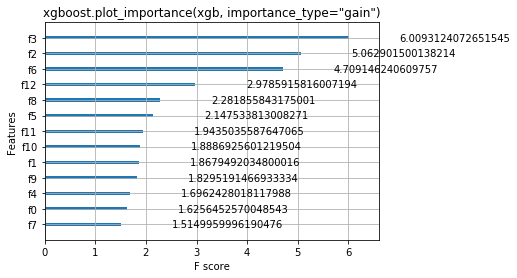

In [31]:
xgboost.plot_importance(xgb, importance_type="gain")
pl.title('xgboost.plot_importance(xgb, importance_type="gain")')
pl.show()

### Explain predictions

In [32]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)

### Visualize a single prediction

In [33]:
X_variable = df[df.columns[2:]]

In [34]:
shap.force_plot(explainer.expected_value, shap_values[0,:],X_variable.iloc[0,:])

In [35]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_variable.iloc[:1000,:])

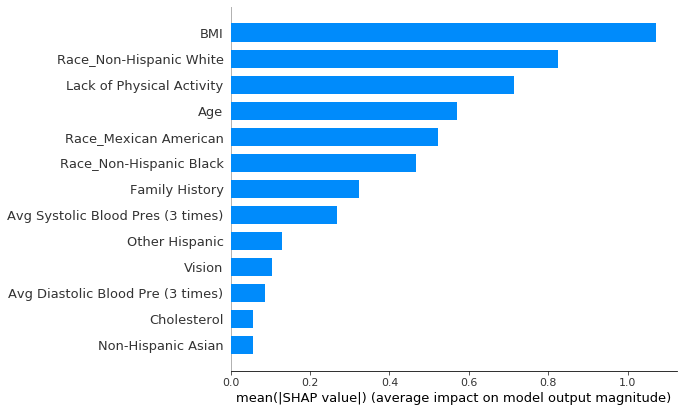

In [36]:
shap.summary_plot(shap_values, X_variable, plot_type="bar")

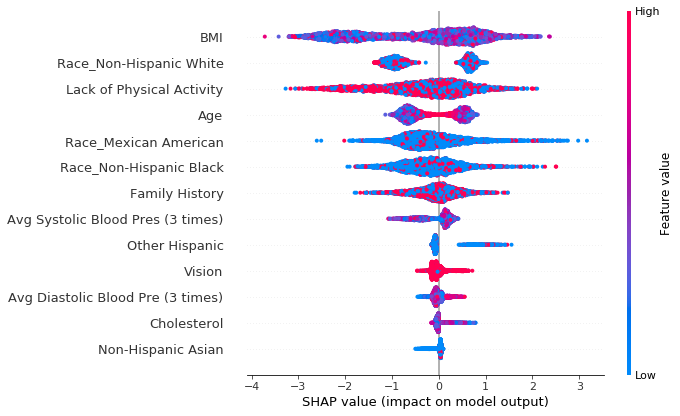

In [40]:
shap.summary_plot(shap_values, X_variable)

for name in X_variable.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X_variable)